<a href="https://colab.research.google.com/github/rrizkiramadhan08/RizkiRamadhanMLTask/blob/main/UAS/TASK%205/Object_Detection_%26_Image_Segmentation_Hero_Kartiko_1103210205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from transformers import pipeline
from PIL import Image

pipe = pipeline("object-detection", model="facebook/detr-resnet-50") #inisiasi pipeline dan model dirancang untuk mendeteksi model pada gambar dengan bounding box

image = Image.open("img4.jpg").convert("RGB")

bounding_boxes = pipe(image)

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [ ]:
# Tampilkan hasil
for box in bounding_boxes:
    print(f"Label: {box['label']}, Confidence: {box['score']:.2f}")
    print(f"Bounding Box: {box['box']}")

Label: handbag, Confidence: 0.71
Bounding Box: {'xmin': 0, 'ymin': 260, 'xmax': 7, 'ymax': 278}
Label: person, Confidence: 0.80
Bounding Box: {'xmin': 40, 'ymin': 255, 'xmax': 48, 'ymax': 270}
Label: handbag, Confidence: 0.91
Bounding Box: {'xmin': 1, 'ymin': 258, 'xmax': 17, 'ymax': 275}
Label: person, Confidence: 1.00
Bounding Box: {'xmin': 211, 'ymin': 245, 'xmax': 233, 'ymax': 306}
Label: backpack, Confidence: 0.73
Bounding Box: {'xmin': 67, 'ymin': 263, 'xmax': 77, 'ymax': 276}
Label: person, Confidence: 0.58
Bounding Box: {'xmin': 188, 'ymin': 241, 'xmax': 193, 'ymax': 258}
Label: person, Confidence: 0.61
Bounding Box: {'xmin': 185, 'ymin': 242, 'xmax': 190, 'ymax': 258}
Label: person, Confidence: 0.68
Bounding Box: {'xmin': 174, 'ymin': 241, 'xmax': 179, 'ymax': 253}
Label: person, Confidence: 0.89
Bounding Box: {'xmin': 52, 'ymin': 251, 'xmax': 60, 'ymax': 272}
Label: person, Confidence: 0.83
Bounding Box: {'xmin': 0, 'ymin': 248, 'xmax': 2, 'ymax': 302}
Label: kite, Confidence

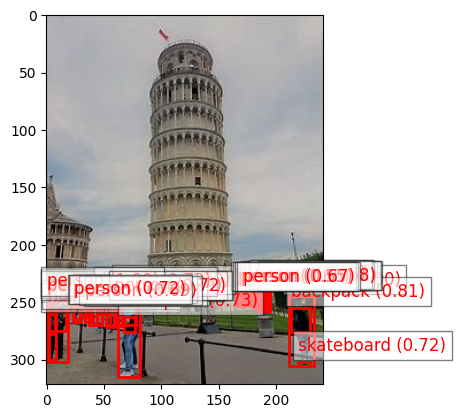

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load gambar
fig, ax = plt.subplots(1)
ax.imshow(image)

# Gambar bounding box
for box in bounding_boxes:
    xmin, ymin, xmax, ymax = box["box"]["xmin"], box["box"]["ymin"], box["box"]["xmax"], box["box"]["ymax"]
    width = xmax - xmin
    height = ymax - ymin

    # Buat rectangle untuk bounding box
    rect = patches.Rectangle(
        (xmin, ymin),
        width,
        height,
        linewidth=2,
        edgecolor="red",
        facecolor="none",
    )
    ax.add_patch(rect)

    # Tambahkan label dan skor
    plt.text(
        xmin,
        ymin - 10,
        f"{box['label']} ({box['score']:.2f})",
        color="red",
        fontsize=12,
        bbox=dict(facecolor="white", alpha=0.5),
    )

plt.show()


In [ ]:
from transformers import pipeline
from PIL import Image #memuat dan memproses gambar

pipe = pipeline("mask-generation", model="facebook/sam-vit-base", device=0) #inisiasi pipeline dan model dirancang untuk menghasilkan masker objek tanpa gambar

raw_image = Image.open("img4.jpg").convert("RGB") #Konversi ke RGB karena model harus dalam format RGB

masks = pipe(raw_image) #array masks dari gambar

Device set to use cpu


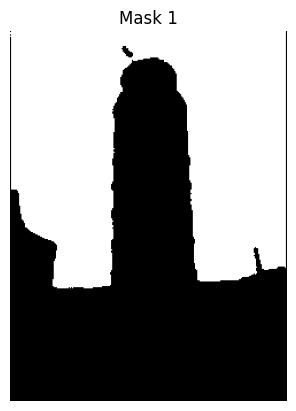

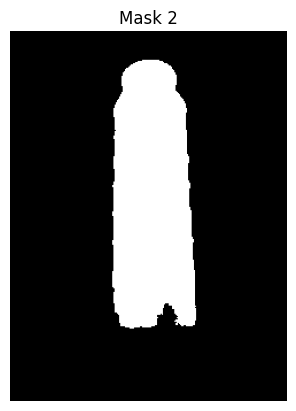

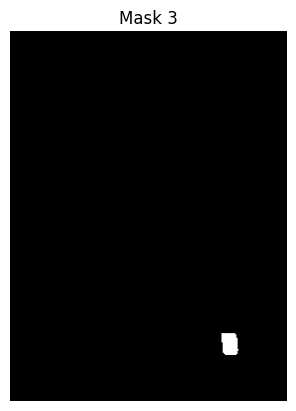

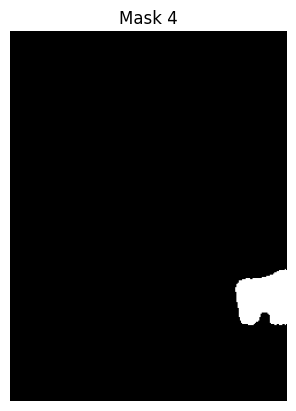

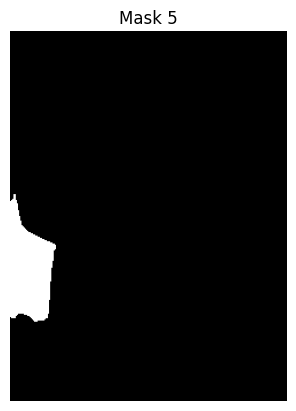

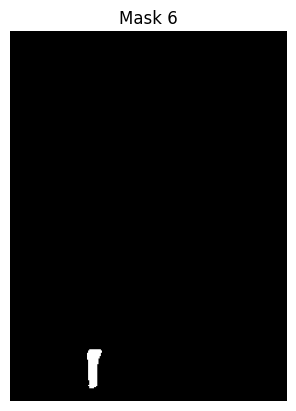

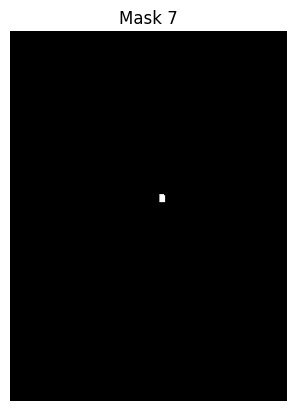

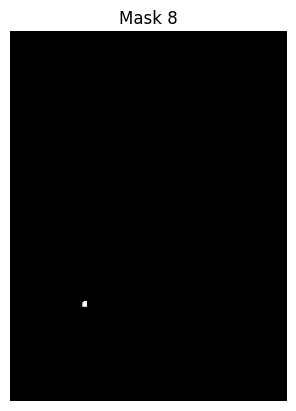

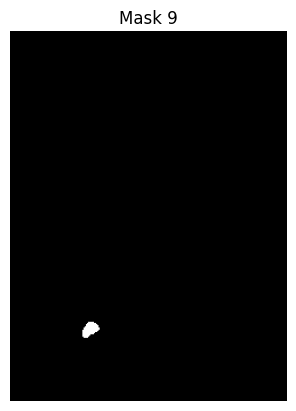

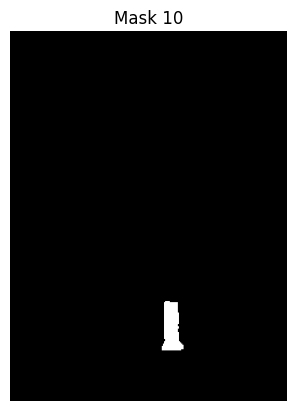

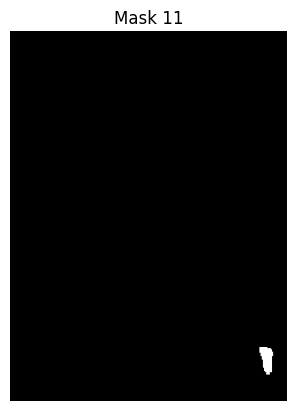

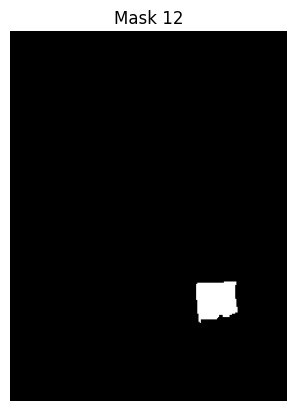

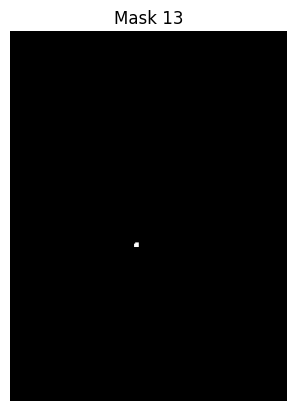

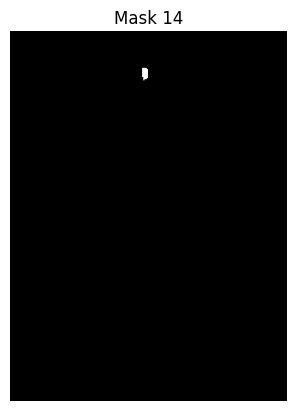

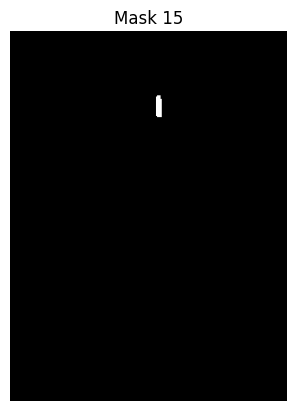

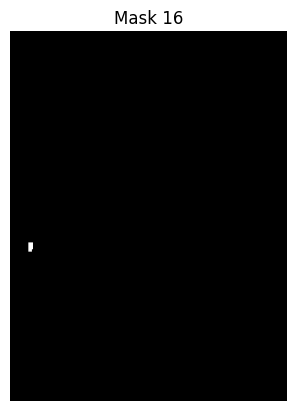

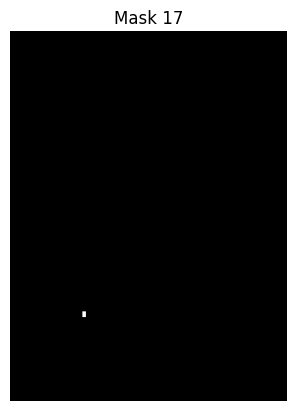

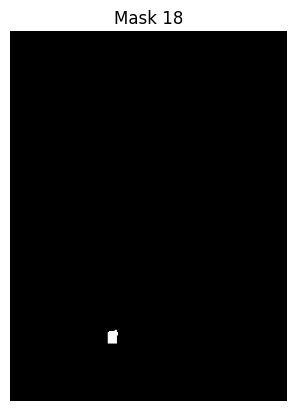

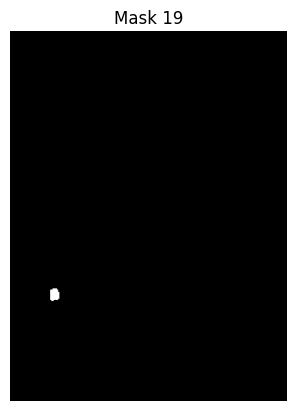

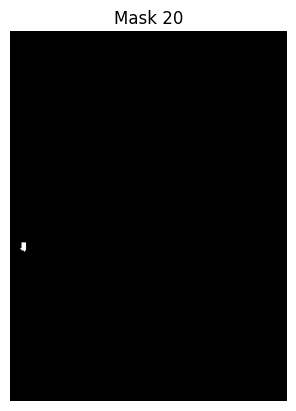

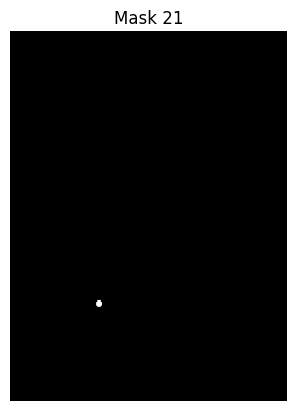

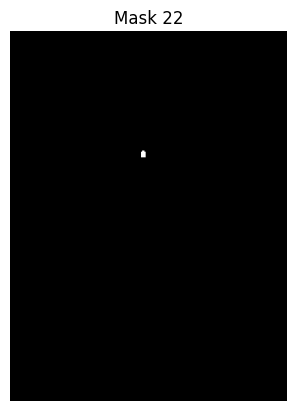

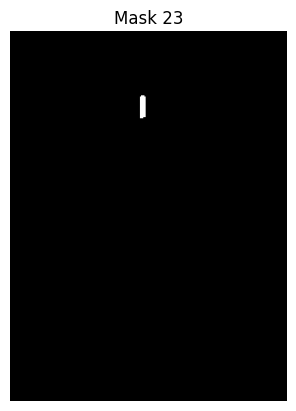

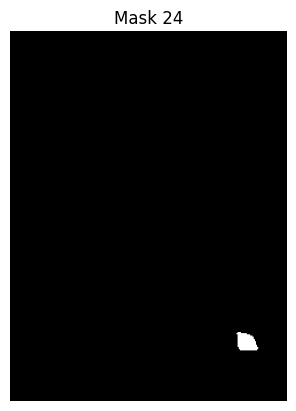

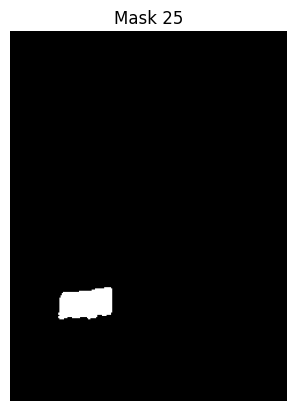

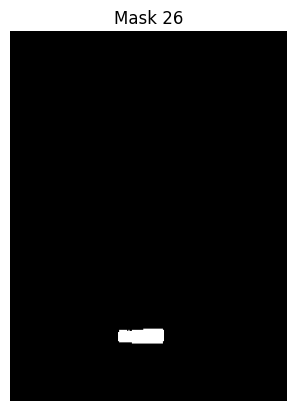

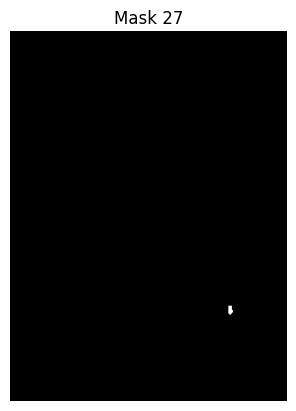

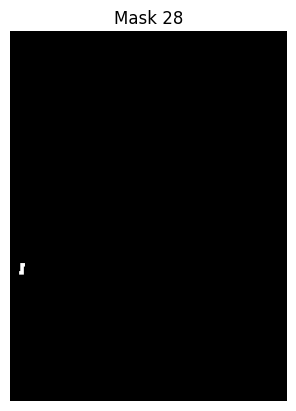

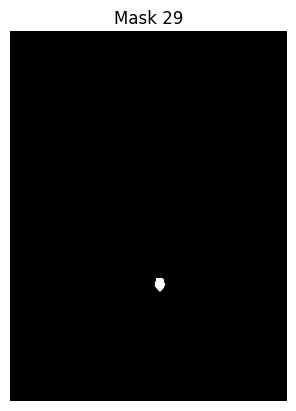

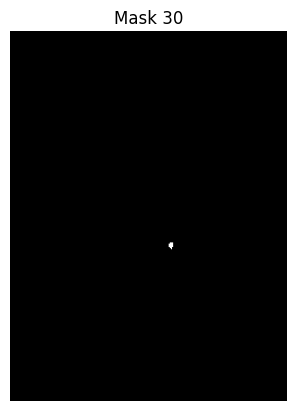

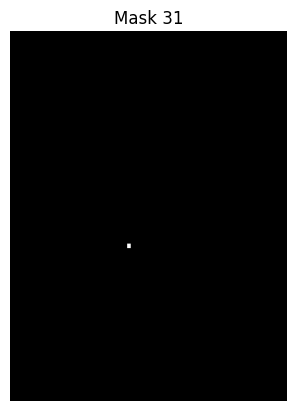

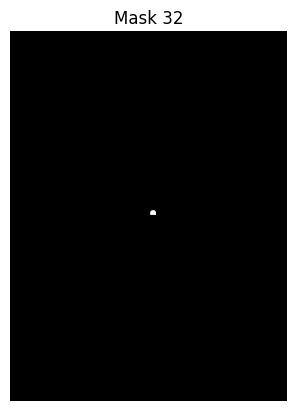

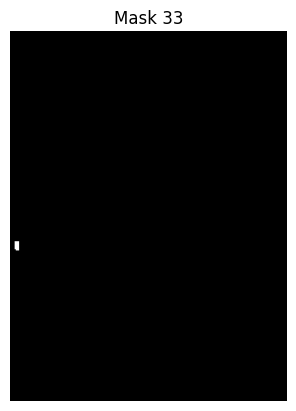

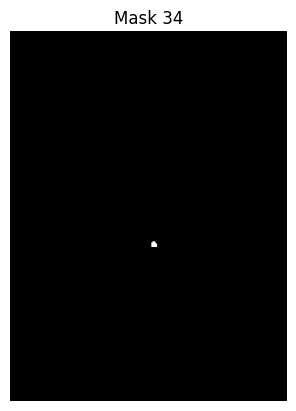

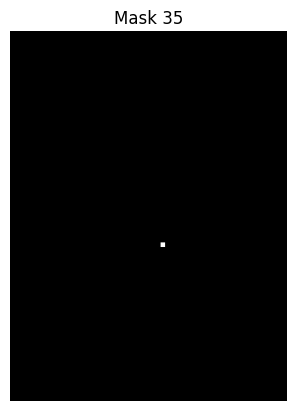

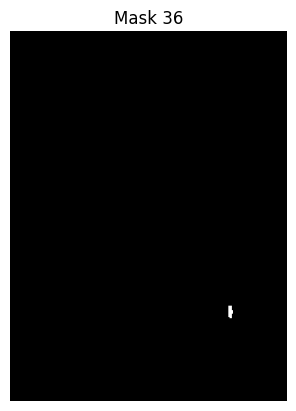

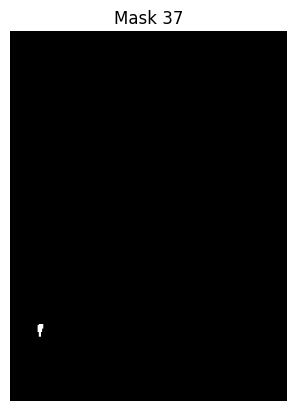

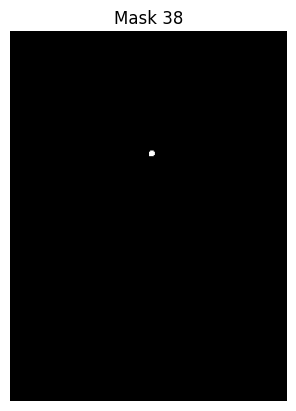

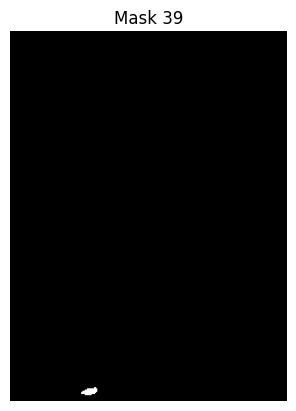

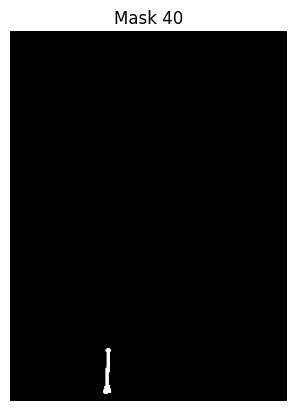

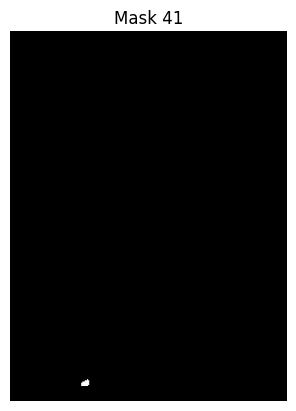

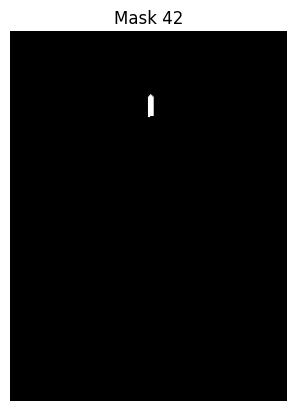

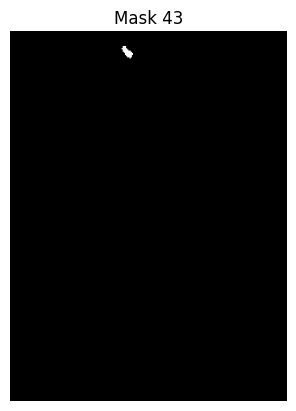

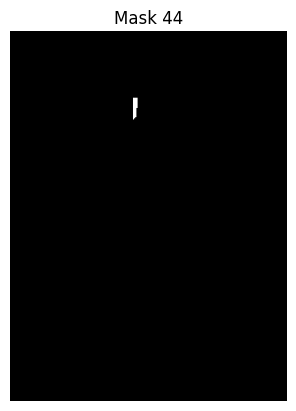

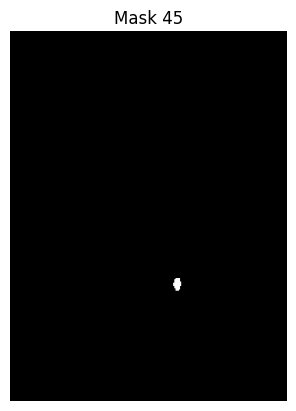

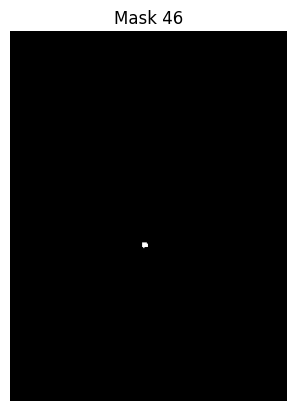

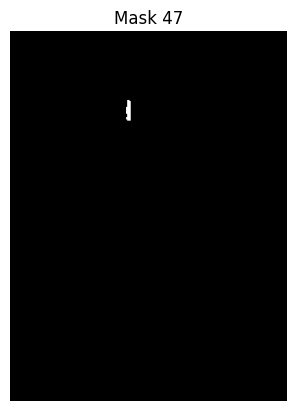

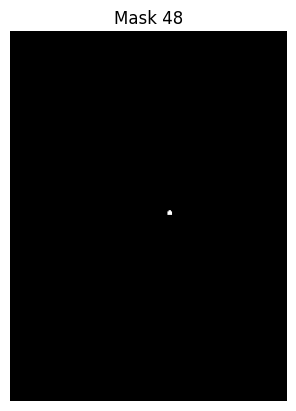

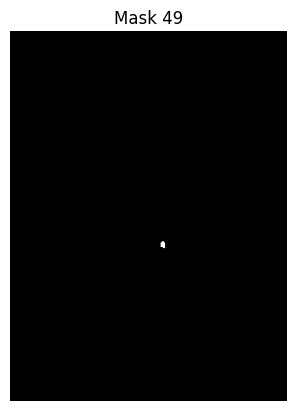

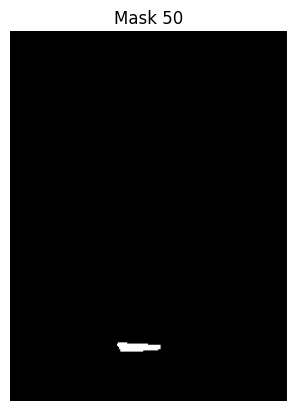

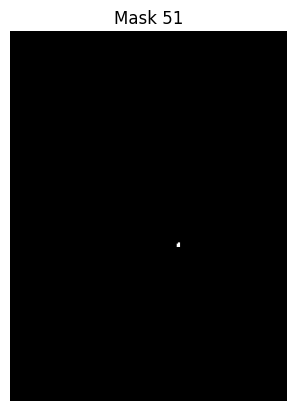

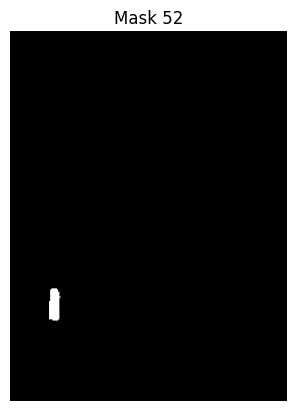

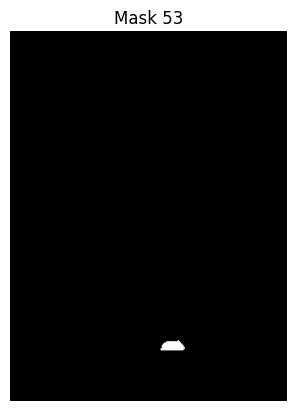

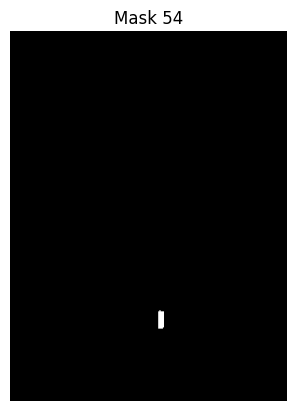

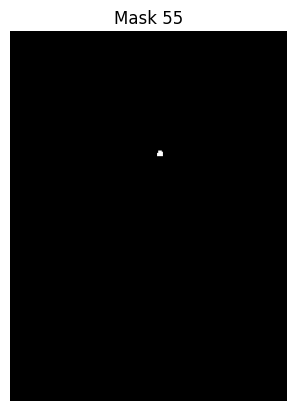

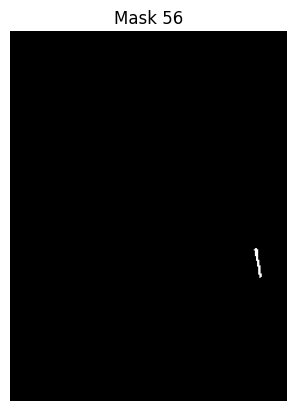

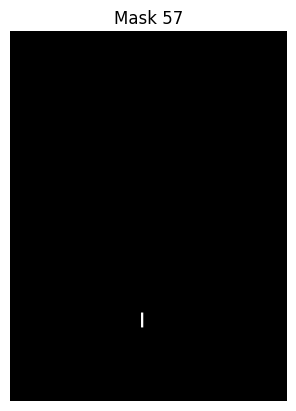

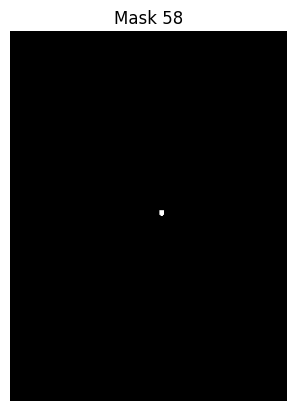

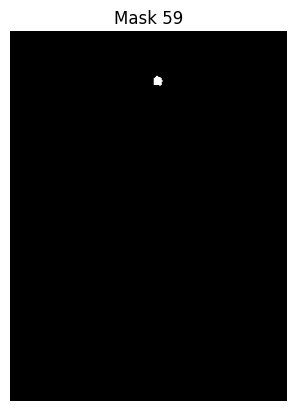

In [ ]:
# Ambil daftar masker dari struktur output
masks_array = masks['masks']

# Visualisasi setiap mask
for idx, mask in enumerate(masks_array):
    plt.figure()
    plt.imshow(mask, cmap='gray')
    plt.title(f"Mask {idx + 1}")
    plt.axis('off')
    plt.show()